# Importing libraries

In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime 
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

# Import Datasets

In [172]:
df1 = pd.read_csv('D:/Data Analysis course/Case study/1.Working with existing question and datasets/Case Study 1/Datasets/202101-divvy-tripdata/202101-divvy-tripdata.csv')
df2 = pd.read_csv('D:/Data Analysis course/Case study/1.Working with existing question and datasets/Case Study 1/Datasets/202102-divvy-tripdata/202102-divvy-tripdata.csv')
df3 = pd.read_csv('D:/Data Analysis course/Case study/1.Working with existing question and datasets/Case Study 1/Datasets/202103-divvy-tripdata/202103-divvy-tripdata.csv')
df4 = pd.read_csv('D:/Data Analysis course/Case study/1.Working with existing question and datasets/Case Study 1/Datasets/202104-divvy-tripdata/202104-divvy-tripdata.csv')
df5 = pd.read_csv('D:/Data Analysis course/Case study/1.Working with existing question and datasets/Case Study 1/Datasets/202105-divvy-tripdata/202105-divvy-tripdata.csv')
df6 = pd.read_csv('D:/Data Analysis course/Case study/1.Working with existing question and datasets/Case Study 1/Datasets/202106-divvy-tripdata/202106-divvy-tripdata.csv')
df7 = pd.read_csv('D:/Data Analysis course/Case study/1.Working with existing question and datasets/Case Study 1/Datasets/202107-divvy-tripdata/202107-divvy-tripdata.csv')
df8 = pd.read_csv('D:/Data Analysis course/Case study/1.Working with existing question and datasets/Case Study 1/Datasets/202108-divvy-tripdata/202108-divvy-tripdata.csv')
df9 = pd.read_csv('D:/Data Analysis course/Case study/1.Working with existing question and datasets/Case Study 1/Datasets/202109-divvy-tripdata/202109-divvy-tripdata.csv')
df10 = pd.read_csv('D:/Data Analysis course/Case study/1.Working with existing question and datasets/Case Study 1/Datasets/202110-divvy-tripdata/202110-divvy-tripdata.csv')
df11 = pd.read_csv('D:/Data Analysis course/Case study/1.Working with existing question and datasets/Case Study 1/Datasets/202111-divvy-tripdata/202111-divvy-tripdata.csv')
df12 = pd.read_csv('D:/Data Analysis course/Case study/1.Working with existing question and datasets/Case Study 1/Datasets/202112-divvy-tripdata/202112-divvy-tripdata.csv')

# Merging all data

In [173]:
cyclistic_data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])
cyclistic_data.shape

(5595063, 13)

In [174]:
cyclistic_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [175]:
cyclistic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 597.6+ MB


# Data Cleaning

In [176]:
#creating a backup
cyclistic_data.to_csv('cyclistic_data.csv')

In [177]:
# change rideable_type to a categorical dtype
cyclistic_data['rideable_type'] = cyclistic_data.rideable_type.astype('category')

In [178]:
#change member_casual to a categorical dtype
cyclistic_data['member_casual'] = cyclistic_data.member_casual.astype('category')

In [179]:
# dropping the (start_lng, end_lat) and(start_lat, end_lat) columns from the dataset
cyclistic_data.drop(['start_lat', 'start_lng', 'end_lat', 'end_lng'], axis=1, inplace=True)

In [180]:
# changing the 'started_at' and 'ended_at' dtype to datetime
cyclistic_data['started_at'] = pd.to_datetime(cyclistic_data.started_at)
cyclistic_data['ended_at'] = pd.to_datetime(cyclistic_data.ended_at)

In [181]:
# finding missing values
cyclistic_data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
member_casual              0
dtype: int64

In [182]:
# adding a new column ride_length (ended_at - started_at) to calculate the time travelled
cyclistic_data['ride_length'] = cyclistic_data['ended_at'] - cyclistic_data['started_at']
cyclistic_data['ride_length']

0        0 days 00:10:25
1        0 days 00:04:04
2        0 days 00:01:20
3        0 days 00:11:42
4        0 days 00:00:43
               ...      
247535   0 days 00:19:13
247536   0 days 00:07:01
247537   0 days 00:08:17
247538   0 days 00:14:13
247539   0 days 00:03:37
Name: ride_length, Length: 5595063, dtype: timedelta64[ns]

In [183]:
# splitting and extracting the date from the 'started_at' column
cyclistic_data['start_date'] = cyclistic_data.started_at.dt.date
cyclistic_data.start_date.head()

0    2021-01-23
1    2021-01-27
2    2021-01-21
3    2021-01-07
4    2021-01-23
Name: start_date, dtype: object

In [184]:
# converting 'start_date' into a datetime
cyclistic_data['start_date'] = pd.to_datetime(cyclistic_data.start_date)

In [185]:
# finding the weekday of the date 
cyclistic_data['day_name'] = cyclistic_data['start_date'].dt.day_name()
cyclistic_data['day_name'].unique()

array(['Saturday', 'Wednesday', 'Thursday', 'Monday', 'Sunday', 'Friday',
       'Tuesday'], dtype=object)

In [186]:
# changing day_name to  categorical dtype
cyclistic_data['day_name'] = cyclistic_data.day_name.astype('category')

In [187]:
# sort day_name
cyclistic_data['day_name'] = cyclistic_data.day_name.astype(CategoricalDtype(categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday'],ordered=True))
cyclistic_data['day_name'].unique()

['Saturday', 'Wednesday', 'Thursday', 'Monday', 'Sunday', 'Friday', 'Tuesday']
Categories (7, object): ['Sunday' < 'Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday']

In [188]:
cyclistic_data['year'] = pd.DatetimeIndex(cyclistic_data['start_date']).year
cyclistic_data['month'] = pd.DatetimeIndex(cyclistic_data['start_date']).month

In [189]:
# sort the dataframe by ascending using start_at
cyclistic_data.sort_values(by=['started_at'], inplace=True , ascending=True)

In [190]:
cyclistic_data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
member_casual              0
ride_length                0
start_date                 0
day_name                   0
year                       0
month                      0
dtype: int64

In [191]:
# drop all rows with NAN values
cyclistic_data.dropna(inplace= True)

In [192]:
#save the cleaned file
cyclistic_data.to_csv('cyclistic_data_cleaned.csv')

In [193]:
cyclistic_data.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
member_casual         0
ride_length           0
start_date            0
day_name              0
year                  0
month                 0
dtype: int64

In [194]:
# check for any duplicated values
cyclistic_data.duplicated().any()

False

# Analysis

In [195]:
# calculate the mean, total count,min, max,and standard deviation of ride length of all types of users
cyclistic_data.ride_length.describe(datetime_is_numeric=True)

count                      4588302
mean     0 days 00:21:48.637676421
std      0 days 03:04:25.503842186
min              -1 days +23:04:06
25%                0 days 00:06:57
50%                0 days 00:12:12
75%                0 days 00:22:07
max               38 days 20:24:09
Name: ride_length, dtype: object

In [196]:
# filtered the negative values
negative_duration = cyclistic_data['ride_length'] < '00:00:00'
# showing the number of negative_duration
cyclistic_data[negative_duration].count()

ride_id               116
rideable_type         116
started_at            116
ended_at              116
start_station_name    116
start_station_id      116
end_station_name      116
end_station_id        116
member_casual         116
ride_length           116
start_date            116
day_name              116
year                  116
month                 116
dtype: int64

**Removed the negative values in the dataset that skewed the result**

In [197]:
# removing the negative duration
cyclistic_data.drop(cyclistic_data[negative_duration].index , inplace=True)

**filtred the ride length into members and casual riders**

In [198]:
# filtering the ride length for members
member_filter = cyclistic_data['member_casual'] == 'member'
cyclistic_data[member_filter].ride_length.describe()

count                      2539431
mean     0 days 00:13:11.022482989
std      0 days 00:17:32.901085710
min                0 days 00:00:00
25%                0 days 00:05:43
50%                0 days 00:09:43
75%                0 days 00:16:31
max                1 days 00:55:38
Name: ride_length, dtype: object

In [199]:
# filtering the ride length for casual riders
cyclistic_data[~member_filter].ride_length.describe()

count                      2048013
mean     0 days 00:32:30.635092648
std      0 days 04:34:58.555432792
min                0 days 00:00:00
25%                0 days 00:09:30
50%                0 days 00:16:39
75%                0 days 00:30:39
max               38 days 20:24:09
Name: ride_length, dtype: object

In [200]:
cyclistic_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,start_date,day_name,year,month
78336,0D139A3203274B87,classic_bike,2021-01-01 00:02:24,2021-01-01 00:08:39,State St & 33rd St,13216,MLK Jr Dr & 29th St,TA1307000139,member,0 days 00:06:15,2021-01-01,Friday,2021,1
39961,C7AE8E9CDB197A8E,classic_bike,2021-01-01 00:06:55,2021-01-01 00:26:36,Lakeview Ave & Fullerton Pkwy,TA1309000019,Ritchie Ct & Banks St,KA1504000134,member,0 days 00:19:41,2021-01-01,Friday,2021,1
33916,3097EF26414C7016,classic_bike,2021-01-01 00:12:21,2021-01-01 00:12:33,Montrose Harbor,TA1308000012,Montrose Harbor,TA1308000012,member,0 days 00:00:12,2021-01-01,Friday,2021,1
33924,938D5D1998A5470E,classic_bike,2021-01-01 00:12:27,2021-01-01 00:12:30,Montrose Harbor,TA1308000012,Montrose Harbor,TA1308000012,casual,0 days 00:00:03,2021-01-01,Friday,2021,1
86537,6604F61AE4B14BC1,electric_bike,2021-01-01 00:12:49,2021-01-01 00:43:59,Western Ave & Howard St,527,Campbell Ave & Fullerton Ave,15648,member,0 days 00:31:10,2021-01-01,Friday,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131716,7B3D0E8AB0842D5E,classic_bike,2021-12-31 23:58:21,2022-01-01 00:46:56,Michigan Ave & Lake St,TA1305000011,Clinton St & Tilden St,13037,casual,0 days 00:48:35,2021-12-31,Friday,2021,12
131717,B5AEBEF3B5F41C77,electric_bike,2021-12-31 23:58:45,2022-01-01 00:47:07,Michigan Ave & Lake St,TA1305000011,Clinton St & Tilden St,13037,casual,0 days 00:48:22,2021-12-31,Friday,2021,12
47588,CE1BE016BCE85CCB,electric_bike,2021-12-31 23:59:27,2022-01-01 00:32:34,Clark St & Ida B Wells Dr,TA1305000009,Clark St & Ida B Wells Dr,TA1305000009,casual,0 days 00:33:07,2021-12-31,Friday,2021,12
52286,B0466FF51982DE4B,electric_bike,2021-12-31 23:59:39,2022-01-01 00:21:08,Millennium Park,13008,Michigan Ave & 14th St,TA1307000124,member,0 days 00:21:29,2021-12-31,Friday,2021,12


**calculate the mode of the weekday for all the users**

In [201]:
# calculate the mode of week-day of all users 
mode_week_day = cyclistic_data['day_name'].mode()
mode_week_day

0    Saturday
Name: day_name, dtype: category
Categories (7, object): ['Sunday' < 'Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday']

In [202]:
# calculte the mode of week-day of members
mode_week_day_member = cyclistic_data[member_filter]
mode_week_day_member = mode_week_day_member['day_name'].mode()
mode_week_day_member

0    Wednesday
Name: day_name, dtype: category
Categories (7, object): ['Sunday' < 'Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday']

In [203]:
# calculate the mode of the week-day of casual riders
mode_week_day_casual = cyclistic_data[~member_filter]
mode_week_day_casual = mode_week_day_casual['day_name'].mode()
mode_week_day_casual

0    Saturday
Name: day_name, dtype: category
Categories (7, object): ['Sunday' < 'Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday']

**The day when users used the bikes the most is on Saturdays, which is also the same for the casual riders. For members riders showed that member riders used the bikes more on Wednesdays.**

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**calculated the number of rides by users in a week**

In [204]:
# calculate the no. of rides by users in a week
count_users = cyclistic_data.groupby('day_name')['ride_id'].count()
count_users = count_users.sort_index()
count_users

day_name
Sunday       714852
Monday       575326
Tuesday      602976
Wednesday    615732
Thursday     597585
Friday       655709
Saturday     825264
Name: ride_id, dtype: int64

In [205]:
# calculate the no. of rides by members in a week
count_members = cyclistic_data[member_filter].groupby('day_name')['ride_id'].count()
count_members

day_name
Sunday       311167
Monday       346428
Tuesday      388071
Wednesday    397618
Thursday     373416
Friday       365711
Saturday     357020
Name: ride_id, dtype: int64

In [206]:
# calculate the no. of rides by casual riders in a week
count_casual = cyclistic_data[~member_filter].groupby('day_name')['ride_id'].count()
count_casual

day_name
Sunday       403685
Monday       228898
Tuesday      214905
Wednesday    218114
Thursday     224169
Friday       289998
Saturday     468244
Name: ride_id, dtype: int64

In [207]:
pd.DataFrame(cyclistic_data[~member_filter].groupby('day_name'))
cyclistic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4587444 entries, 78336 to 100735
Data columns (total 14 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       category       
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   member_casual       category       
 9   ride_length         timedelta64[ns]
 10  start_date          datetime64[ns] 
 11  day_name            category       
 12  year                int64          
 13  month               int64          
dtypes: category(3), datetime64[ns](3), int64(2), object(5), timedelta64[ns](1)
memory usage: 433.1+ MB


**It showed that member riders used the bikes more on weekdays compared to casual riders.**

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**The analysis reveals that member riders used the bikes more on weekdays, whereas casual riders tended to use the bikes more on weekends. This suggests that member riders primarily use the bikes for commuting to and from work on weekdays, while casual riders tend to use the bikes for running errands on weekends.**

# VISUALIZTION

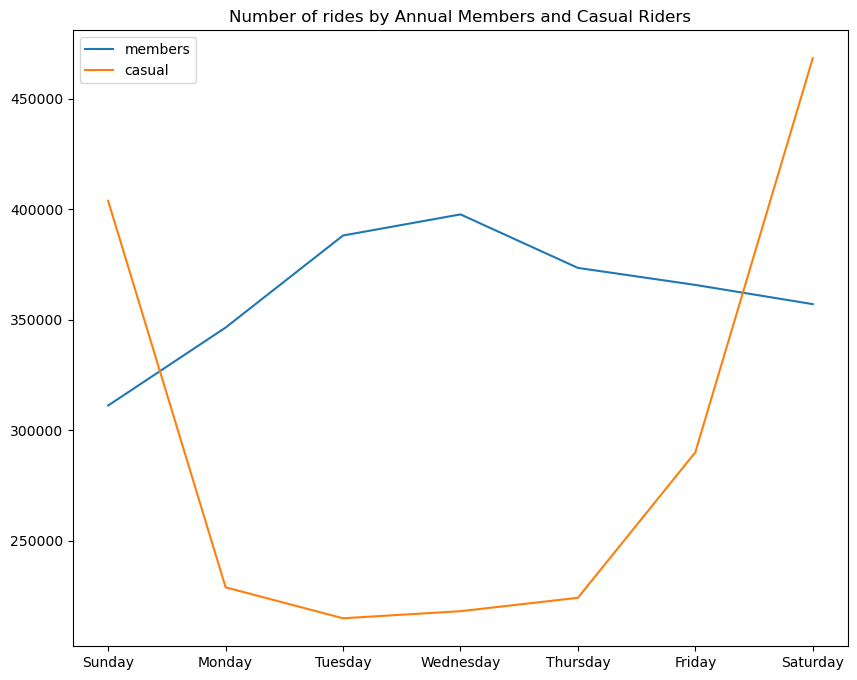

In [208]:
# plot the graph for number of rides by casual riders and annual members
plt.figure(figsize = (10,8)) 
plt.plot(count_members.index,count_members.values)
plt.plot(count_casual.index,count_casual.values)
plt.title('Number of rides by Annual Members and Casual Riders')
plt.legend(['members','casual'])
plt.show()

**This visualization shows that the use of bikes by casual riders increases on weekends and remains stable at a lower level during weekdays.In contrast, member riders tend to use bikes more on weekdays and less on weekends.**

In [209]:
# calculate the average ride length for all users in a week
user_avg_rides = cyclistic_data.groupby('day_name')['ride_length'].mean(numeric_only=False)
user_avg_rides

day_name
Sunday      0 days 00:27:50.981617173
Monday      0 days 00:20:38.878588834
Tuesday     0 days 00:18:14.297945523
Wednesday   0 days 00:18:03.538635315
Thursday    0 days 00:18:13.650349322
Friday      0 days 00:20:48.576697894
Saturday    0 days 00:26:11.803202369
Name: ride_length, dtype: timedelta64[ns]

In [210]:
# calculate the average ride length for members in a week
user_avg_members = cyclistic_data[member_filter].groupby('day_name')['ride_length'].mean(numeric_only=False)
user_avg_members

day_name
Sunday      0 days 00:15:11.692814469
Monday      0 days 00:12:43.518309720
Tuesday     0 days 00:12:23.223956440
Wednesday   0 days 00:12:27.483320674
Thursday    0 days 00:12:21.218391820
Friday      0 days 00:12:47.563775768
Saturday    0 days 00:14:49.105277015
Name: ride_length, dtype: timedelta64[ns]

In [211]:
# calculate the average ride length for casual_riders in a week
user_avg_casual = cyclistic_data[cyclistic_data['member_casual'] == 'casual'].groupby('day_name')['ride_length'].mean(numeric_only=False)
user_avg_casual 

day_name
Sunday      0 days 00:37:36.253843962
Monday      0 days 00:32:38.317425228
Tuesday     0 days 00:28:48.260087015
Wednesday   0 days 00:28:16.161585226
Thursday    0 days 00:28:00.724083169
Friday      0 days 00:30:55.173008089
Saturday    0 days 00:34:52.336969614
Name: ride_length, dtype: timedelta64[ns]

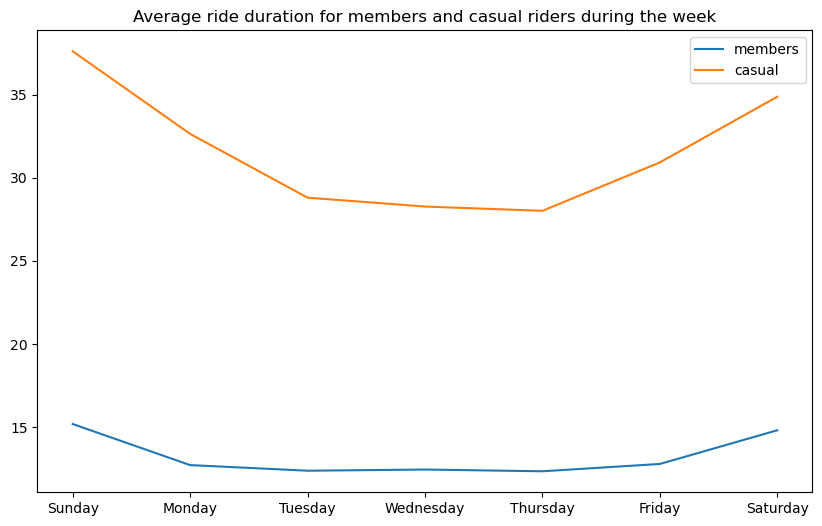

In [212]:
# plot the average ride_length for different users during the week
plt.figure(figsize = (10,6))
plt.plot(user_avg_members/pd.Timedelta(minutes=1))
plt.plot(user_avg_casual/pd.Timedelta(minutes=1))
plt.title('Average ride duration for members and casual riders during the week')
plt.legend(['members','casual'])
plt.show()

In [213]:
# check the number of users in each type over the past 12 months
user_types = cyclistic_data['member_casual'].value_counts()
user_types

member    2539431
casual    2048013
Name: member_casual, dtype: int64

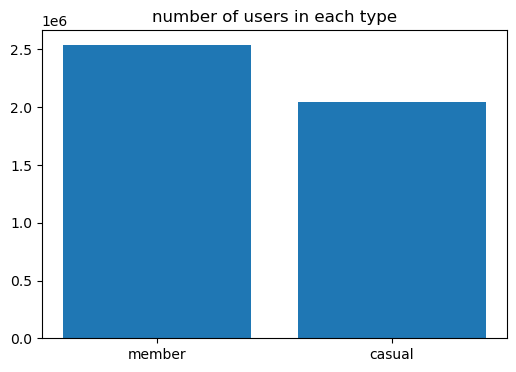

In [214]:
# plot the bar chart of the number of users in each type over the past 12 months
plt.figure(figsize = (6,4))
plt.bar(user_types.index,user_types.values)
plt.title('number of users in each type')
plt.show()

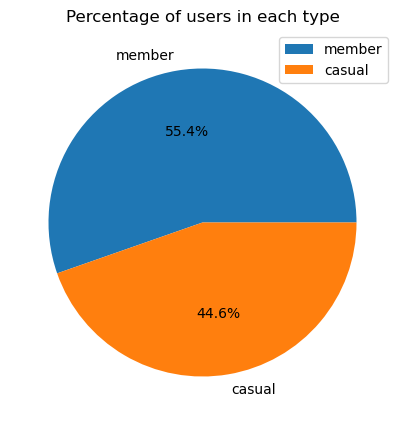

In [215]:
# plot the pie chart of users in each type
plt.figure(figsize= (6,5))
plt.pie(user_types.values,labels= user_types.index,autopct='%1.1f%%') 
plt.title('Percentage of users in each type')
plt.legend(user_types.index)
plt.show()

**The bar graph and the pie chart show that cyclisic has more members riders than casual riders.**

In [216]:
# check the amount of users for a particular ride_type
ride_type = cyclistic_data.groupby('member_casual')['rideable_type'].value_counts()
ride_type

member_casual               
casual         classic_bike     1261331
               electric_bike     474679
               docked_bike       312003
member         classic_bike     1980041
               electric_bike     559389
               docked_bike            1
Name: rideable_type, dtype: int64

In [217]:
# segregate the number of users into members and casual riders based on ride type
list_member = []
list_x = []
list_y = list(ride_type.values)
for i, j in ride_type.index:
    list_x.append(j)
    list_member.append(str(i))

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Member and Casual riders over the months based on ride_type')

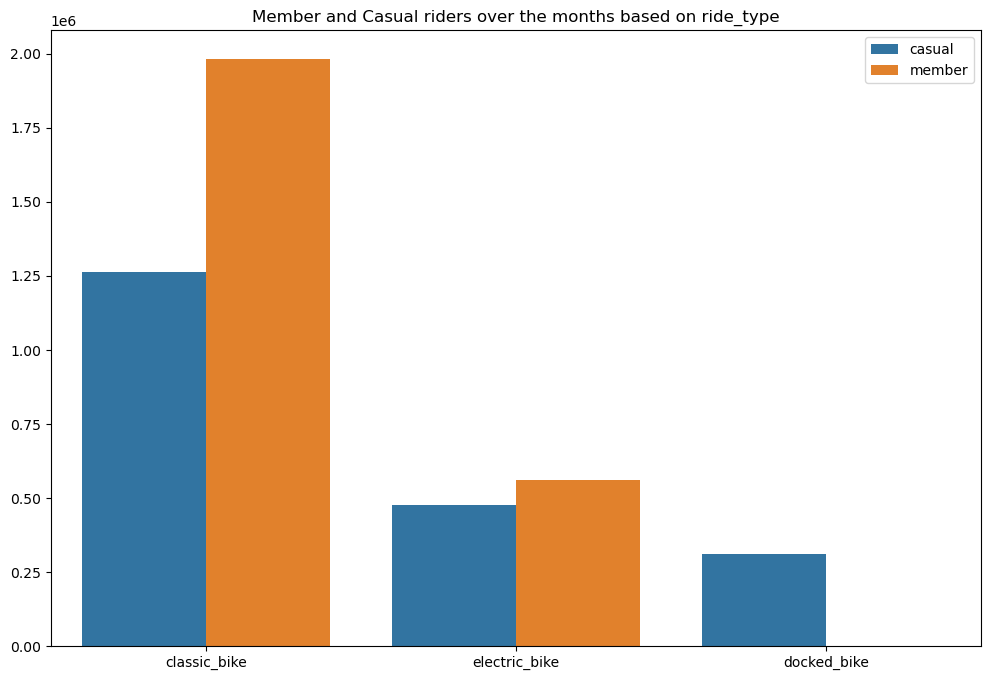

In [218]:
# plot the number of users into members and casual riders based on rider type
plt.figure(figsize=(12,8))
sns.barplot(list_x, list_y, hue=list_member)
plt.title('Member and Casual riders over the months based on ride_type')

**The bar graph shows that member riders used the bikes more frequently than casual riders and did not use the docked bikes**

In [219]:
# get the total amount of users in each category per month
users_over_month = cyclistic_data.groupby('month')['member_casual'].value_counts()
users_over_month

month        
1      member     68801
       casual     14688
2      member     34370
       casual      8612
3      member    130016
       casual     75624
4      member    177752
       casual    120393
5      member    234112
       casual    216785
6      member    304537
       casual    304144
7      casual    369356
       member    322856
8      casual    341427
       member    332880
9      member    328152
       casual    292893
10     member    288797
       casual    189080
11     member    185890
       casual     69950
12     member    131268
       casual     45061
Name: member_casual, dtype: int64

In [220]:
# seggregate the number of users into members and casual over months
list_month = []
list_x = []
list_y = (users_over_month.values)
for i, j in users_over_month.index:
    list_x.append(j)
    list_month.append(str(i))

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of member and casual riders over the months')

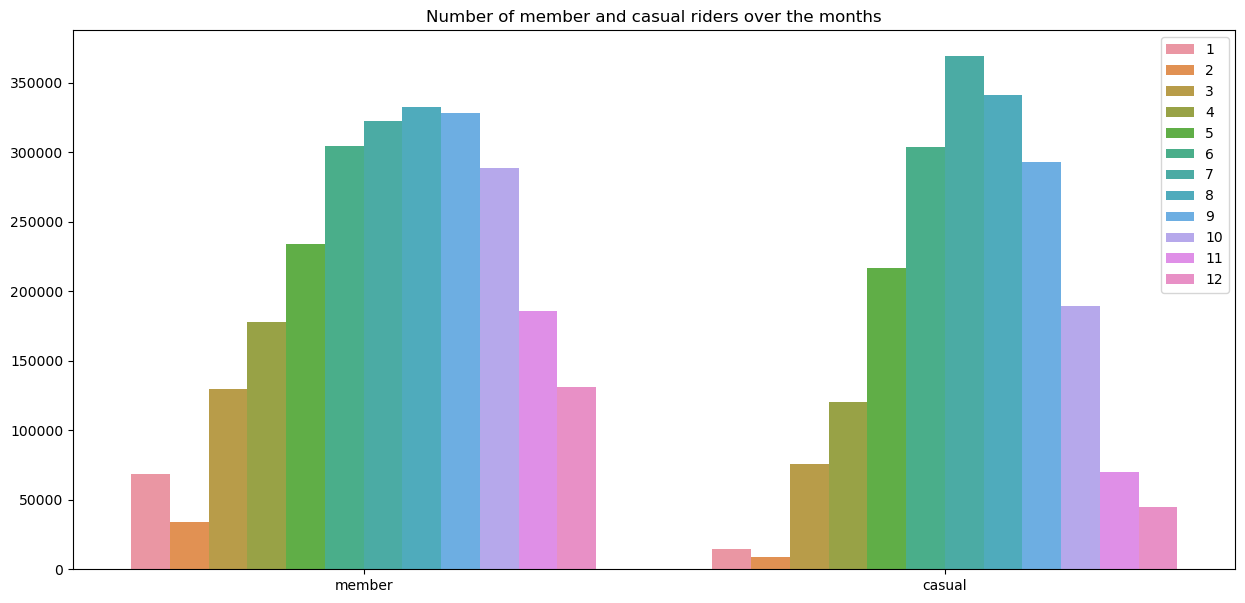

In [221]:
# plot count of members and casual riders over months
plt.figure(figsize= (15,7))
sns.barplot(list_x, list_y, hue =list_month)
plt.title('Number of member and casual riders over the months')

# Conclusion

Insights
* Cyclistic has more member riders than casual riders.
* Casual riders use the bikes for longer periods of time compared to member riders.
* Casual riders use the bikes heavily during the weekends, whereas member riders tend to use the bikes more on weekdays
* During the months of July and August, Cyclistic had the highest number of casual riders among all the months
* The Docked Bike ride type has no member rider users.

Recommendations
* Since casual riders tend to use the bikes for longer periods than member riders, we should offer promotions focused on subscriptions and usage time to gain more members.
* Since most of casual riders use the bikes during the weekends, our marketing strategies should target casual riders that use the bikes for running errands on weekends.
* Since the months of July and August have a high number of casual riders, we should allocate more marketing resources towards this period to make more subcribers from casual riders and people who haven't used our bikes.
* As the Docked Bike ride type has no member rider users, we should create a Docked Bike-only subscription promotion to make more members from among the casual riders who typically use Docked Bikes.